In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
backSub = cv.createBackgroundSubtractorMOG2()
blurredBackSub = cv.createBackgroundSubtractorMOG2()

In [3]:
file = "multiball"
# file = "half_hour"

In [4]:
capture = cv.VideoCapture(cv.samples.findFileOrKeep(f'./data/{file}_cropped_610px.mkv'))

In [5]:
if not capture.isOpened():
    print('Unable to open file')
    exit(0)

In [6]:
image_pairs = []
for _ in range(2000):
    ret, frame = capture.read()
    if frame is None:
        break
    fgMask = backSub.apply(frame)
    maskFrame = cv.cvtColor(fgMask, cv.COLOR_GRAY2RGB)
    image_pairs.append((frame, maskFrame))


In [7]:
IMAGE = 0
MASK = 1

In [8]:
print(image_pairs[0][IMAGE].shape)

(1080, 610, 3)


In [9]:
def display_image_pair(index):
    image, mask = image_pairs[index]
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    frame = np.concatenate((image, mask), axis=1)
    plt.imshow(frame)

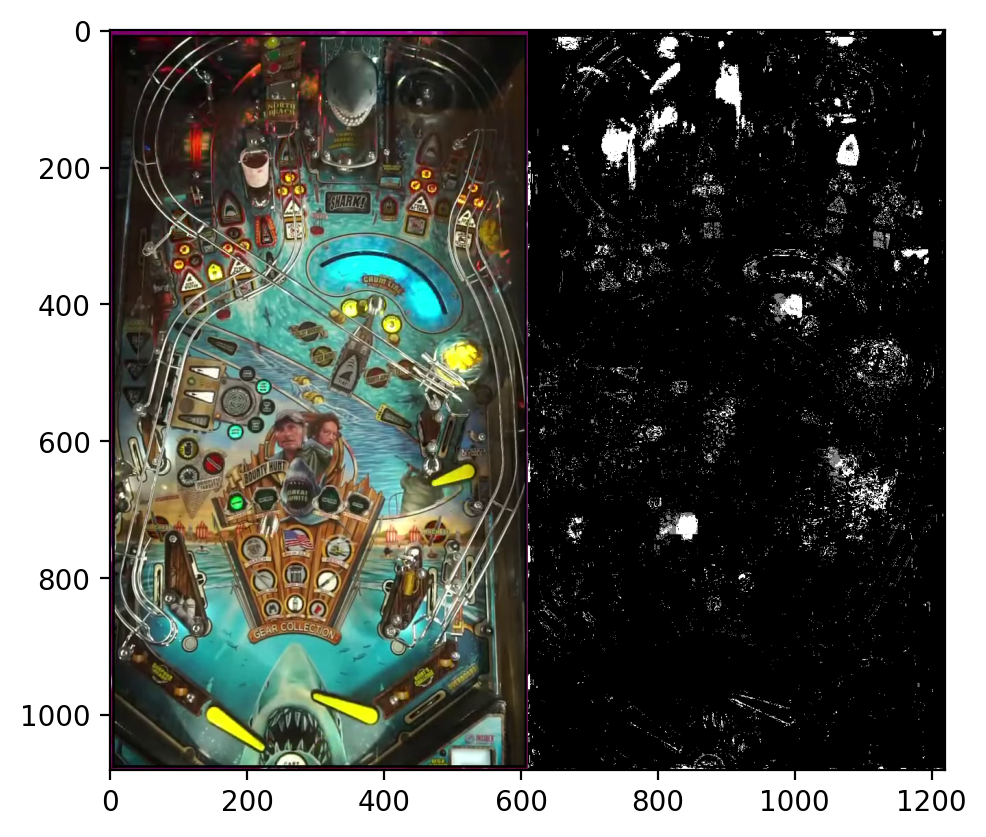

In [10]:
display_image_pair(100)

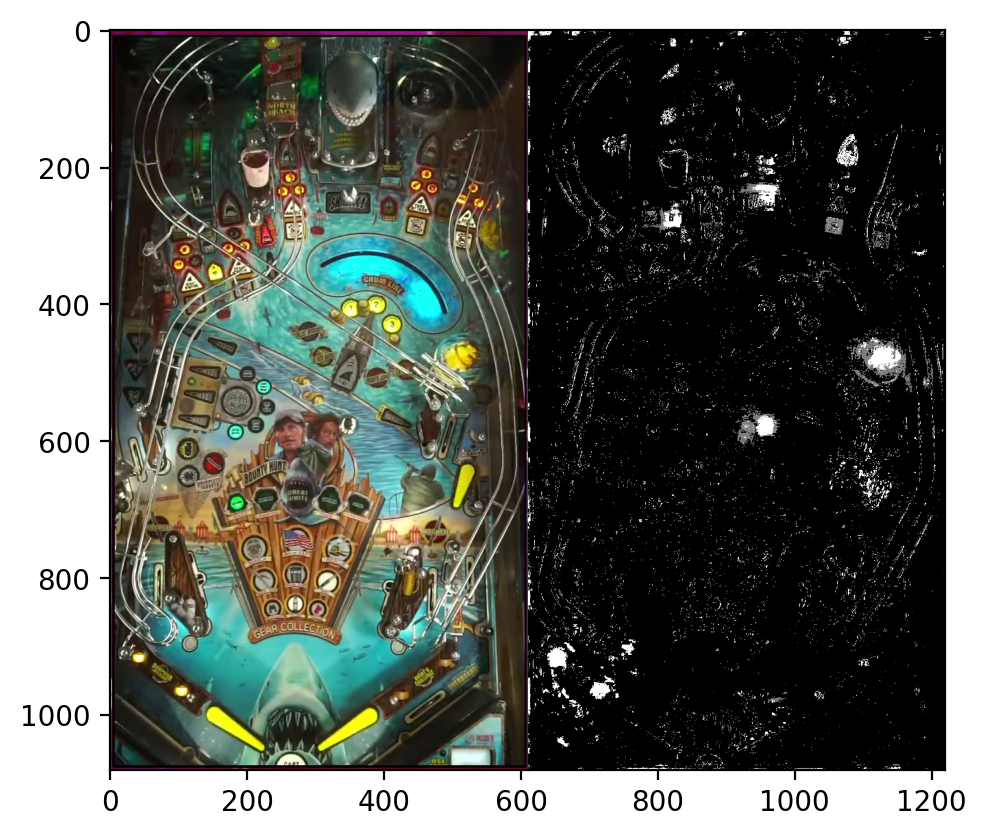

In [11]:
display_image_pair(200)

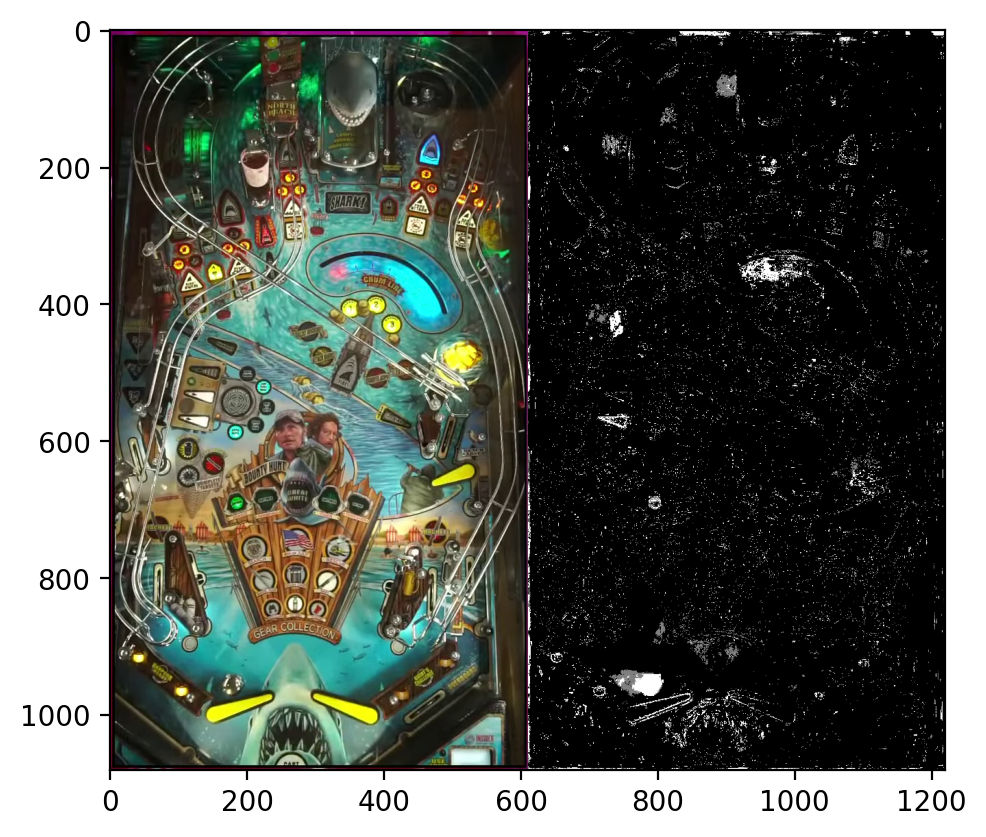

In [12]:
display_image_pair(300)

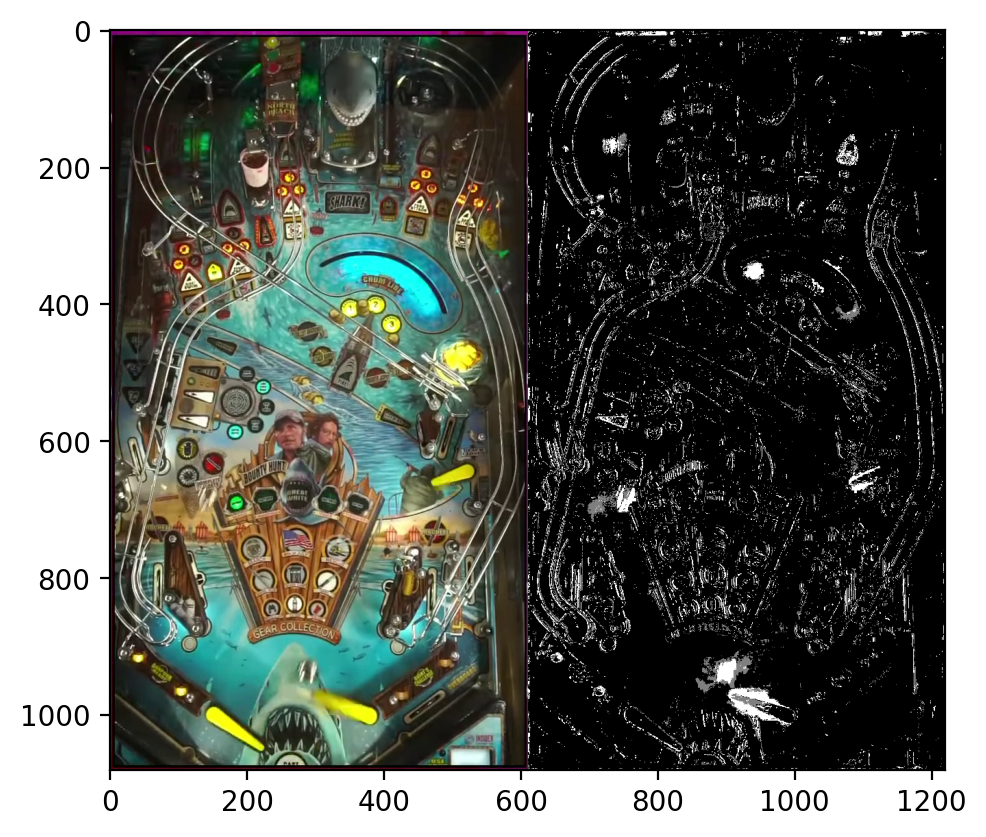

In [13]:
display_image_pair(400)

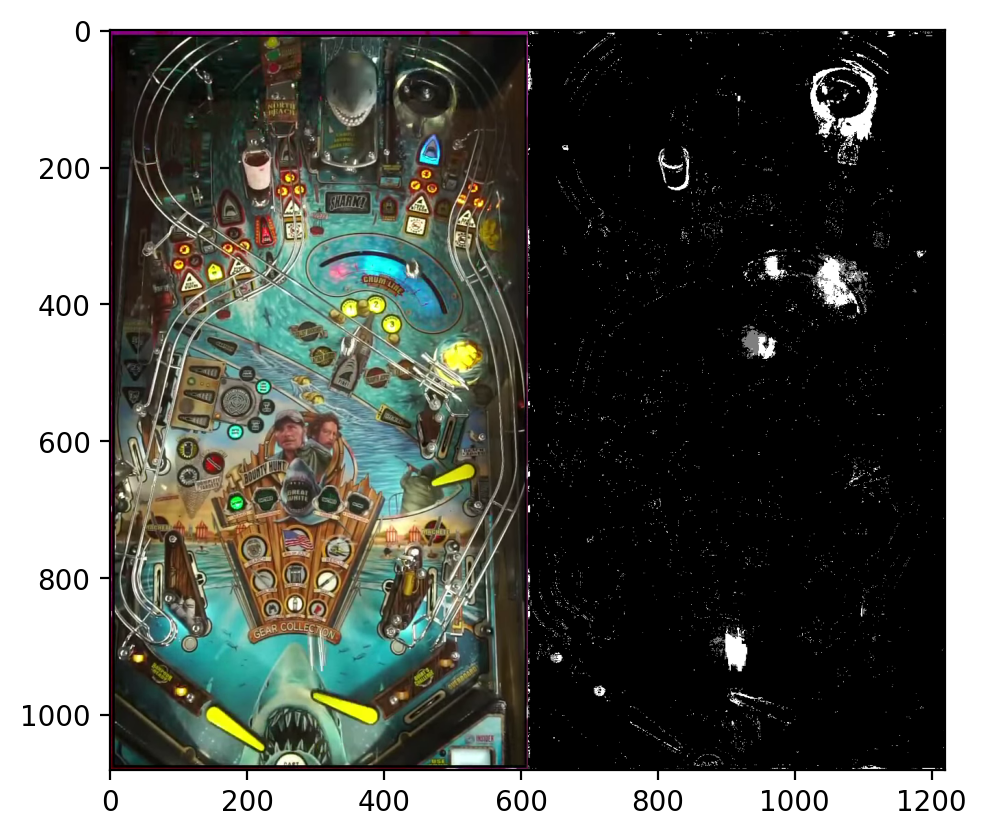

In [14]:
display_image_pair(500)

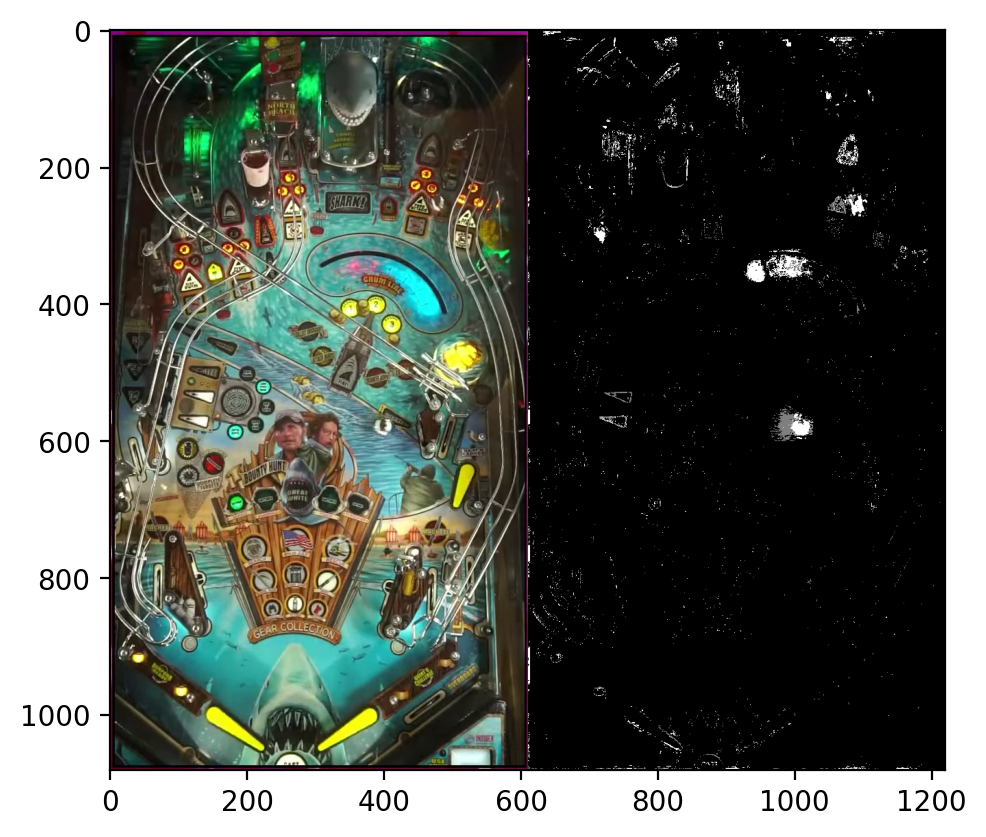

In [15]:
display_image_pair(600)

In [16]:
fps = 50
video_dim = (1220, 1080)
video_writer = cv.VideoWriter(f"./artifacts/{file}.avi", cv.VideoWriter_fourcc(*'XVID'), fps, video_dim)
for image_pair in image_pairs:
    combined_frame = np.concatenate(image_pair, axis=1)
    video_writer.write(combined_frame)
video_writer.release()